# Geometry Optimization of Water Molecule (H₂O)

In this case study, we demonstrate **geometry optimization** of a water molecule using  
the **FAIRChem MLIP** with ASE’s optimization algorithms.

**Objectives:**
1. Build a water molecule with ASE’s molecular builder.  
2. Set spin and charge information.  
3. Attach the FAIRChem calculator (`uma-s-1`).  
4. Optimize the geometry using the **LBFGS** optimizer.  
5. Compare the **initial** vs **optimized** geometry (bond lengths and bond angle).  
6. Visualize the optimized structure.  


In [1]:
from ase.build import molecule
from ase.optimize import LBFGS
from ase.visualize import view
from ase.io import Trajectory
import matplotlib.pyplot as plt

from fairchem.core import FAIRChemCalculator, pretrained_mlip

# --- Load FAIRChem MLIP ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1", device="cpu")
calc = FAIRChemCalculator(predictor, task_name="omol")

# --- Build water molecule ---
water = molecule("H2O")
water.info.update({"spin": 1, "charge": 0})

# Attach calculator
water.calc = calc

# --- Print initial geometry ---
print("Initial Geometry of H2O")
print(f"O–H1 = {water.get_distance(0,1):.3f} Å, O–H2 = {water.get_distance(0,2):.3f} Å")
print(f"H–O–H angle = {water.get_angle(1,0,2):.2f}°\n")

# --- Optimize geometry ---
dyn = LBFGS(water, trajectory="lbfgs_h2o.traj")
dyn.run(fmax=0.0001)

# --- Print optimized geometry ---
print("Optimized Geometry of H2O")
print(f"O–H1 = {water.get_distance(0,1):.3f} Å, O–H2 = {water.get_distance(0,2):.3f} Å")
print(f"H–O–H angle = {water.get_angle(1,0,2):.2f}°")

W0913 18:07:07.822893 45908 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


Initial Geometry of H2O
O–H1 = 0.969 Å, O–H2 = 0.969 Å
H–O–H angle = 104.00°

       Step     Time          Energy          fmax
LBFGS:    0 18:07:11    -2079.861719        0.483773
LBFGS:    1 18:07:11    -2079.864175        0.110125
LBFGS:    2 18:07:11    -2079.864371        0.026661
LBFGS:    3 18:07:11    -2079.864396        0.020670
LBFGS:    4 18:07:11    -2079.864427        0.004628
LBFGS:    5 18:07:11    -2079.864427        0.000617
LBFGS:    6 18:07:11    -2079.864427        0.000125
LBFGS:    7 18:07:11    -2079.864427        0.000127
LBFGS:    8 18:07:11    -2079.864427        0.000495
LBFGS:    9 18:07:11    -2079.864427        0.000760
LBFGS:   10 18:07:11    -2079.864427        0.000898
LBFGS:   11 18:07:12    -2079.864427        0.000593
LBFGS:   12 18:07:12    -2079.864427        0.000173
LBFGS:   13 18:07:12    -2079.864428        0.000022
Optimized Geometry of H2O
O–H1 = 0.962 Å, O–H2 = 0.962 Å
H–O–H angle = 104.96°


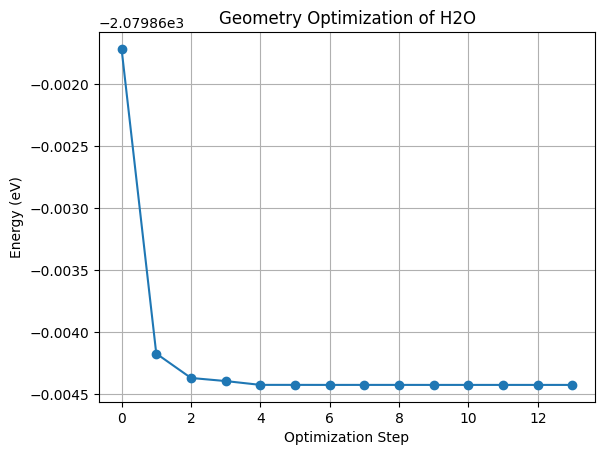

In [2]:
# --- Plot energy vs optimization step ---

traj = Trajectory("lbfgs_h2o.traj")

energies = [atoms.get_potential_energy() for atoms in traj]
plt.plot(range(len(energies)), energies, marker="o")
plt.xlabel("Optimization Step")
plt.ylabel("Energy (eV)")
plt.title("Geometry Optimization of H2O")
plt.grid(True)
plt.show()


In [3]:
# Visualize all steps in the trajectory 
print("Showing optimization trajectory...")

view(traj, viewer='ngl')

Showing optimization trajectory...


In [4]:
# --- Visualize optimized structure ---
view(water, viewer="ngl")